In [3]:
import sweetviz as sv

In [4]:
import pandas as pd 
import pytz
import numpy as np
import seaborn as sns

In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from torchtext.data.utils import get_tokenizer

import matplotlib.pyplot as plt

import torch
from torch import nn 
import torch.nn.functional as F
from torch import utils

torch.manual_seed(0)
np.random.seed(0)

import warnings
warnings.filterwarnings("ignore")

In [6]:
train=pd.read_csv('https://raw.githubusercontent.com/zerickzhan/Group-20/main/review_train.csv')
challenge=pd.read_csv('https://raw.githubusercontent.com/zerickzhan/Group-20/main/review_challenge.csv')

In [7]:
train

,review_id,user_name,airline_sentiment,sentiment_confidence,negative_reason,negative_reason_confidence,airline_name,review_text,thumbup_count,review_coordinates,review_timestamp,review_city,user_timezone
0,570306133677760513,cairdin,neutral,1.0000,NaN,NaN,EgyptAir,What said.,0,NaN,24/2/2015 11:35,NaN,Eastern Time (US & Canada)
1,570301130888122368,jnardino,positive,0.3486,NaN,0.0000,EgyptAir,plus you've added commercials to the experienc...,0,NaN,24/2/2015 11:15,NaN,Pacific Time (US & Canada)
2,570301083672813571,yvonnalynn,neutral,0.6837,NaN,NaN,EgyptAir,I didn't today... Must mean I need to take ano...,0,NaN,24/2/2015 11:15,Lets Play,Central Time (US & Canada)
3,570301031407624196,jnardino,negative,1.0000,Bad Flight,0.7033,EgyptAir,"it's really aggressive to blast obnoxious ""ent...",0,NaN,24/2/2015 11:15,NaN,Pacific Time (US & Canada)
4,570300817074462722,jnardino,negative,1.0000,Can't Tell,1.0000,EgyptAir,and it's a really big bad thing about it,0,NaN,24/2/2015 11:14,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13757,569587686496825344,KristenReenders,positive,0.3487,NaN,0.0000,Qantas,thank you we got on a different flight to Chic...,0,NaN,22/2/2015 12:01,NaN,NaN
13758,569587371693355008,itsropes,negative,1.0000,Customer Service Issue,1.0000,Qantas,leaving over minutes Late Flight. No warnings ...,0,NaN,22/2/2015 11:59,Texas,NaN
13759,569587242672398336,sanyabun,neutral,1.0000,NaN,NaN,Qantas,Please bring American Airlines to #BlackBerry,0,NaN,22/2/2015 11:59,"Nigeria,lagos",NaN
13760,569587188687634433,SraJackson,negative,1.0000,Customer Service Issue,0.6659,Qantas,"you have my money, you change my flight, and d...",0,NaN,22/2/2015 11:59,New Jersey,Eastern Time (US & Canada)


In [8]:
# Univariate Analysis

In [9]:
analyze_report = sv.analyze(train)

                                             |                                             | [  0%]   00:00 ->…

In [10]:
analyze_report.show_html('report.html')

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [11]:
analyze_reportchallenge = sv.analyze(challenge)

                                             |                                             | [  0%]   00:00 ->…

In [12]:
analyze_reportchallenge.show_html('challenge.html')

Report challenge.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [13]:
train['review_id'].describe()

count    1.376200e+04
mean     5.692199e+17
std      7.793554e+14
min      5.675883e+17
25%      5.685594e+17
50%      5.694844e+17
75%      5.698917e+17
max      5.703106e+17
Name: review_id, dtype: float64

We need to first identify dependent values, independent values , categorical values, and continuous values before we intitial our EDA analysis. 

In [14]:
train[train["review_id"]==570286841737318400]

,review_id,user_name,airline_sentiment,sentiment_confidence,negative_reason,negative_reason_confidence,airline_name,review_text,thumbup_count,review_coordinates,review_timestamp,review_city,user_timezone
11230,570286841737318400,djjohnpayne,negative,1.0,Cancelled Flight,0.6304,Qantas,you guys are killing me. http://t.co/iPGeIcSm,0,"[0.0, 0.0]",24/2/2015 10:19,"Las Vegas, NV",Pacific Time (US & Canada)
11384,570286841737318400,djjohnpayne,negative,1.0,Cancelled Flight,1.0000,Qantas,you guys are killing me. http://t.co/iPGeIcSm,0,"[0.0, 0.0]",24/2/2015 10:19,"Las Vegas, NV",Pacific Time (US & Canada)


In [15]:
train[train["review_id"]==570267562623152128]

,review_id,user_name,airline_sentiment,sentiment_confidence,negative_reason,negative_reason_confidence,airline_name,review_text,thumbup_count,review_coordinates,review_timestamp,review_city,user_timezone
11298,570267562623152128,alinaxkristin,negative,1.0,Flight Attendant Complaints,1.0000,Qantas,you could train your flight attendants to have...,0,NaN,24/2/2015 9:02,Miami,Quito
11453,570267562623152128,alinaxkristin,negative,1.0,Flight Attendant Complaints,0.6688,Qantas,you could train your flight attendants to have...,0,NaN,24/2/2015 9:02,Miami,Quito


In [16]:
train=train.sort_values(by=['sentiment_confidence'])
train=train.drop_duplicates(subset=['review_id'], keep='last')

from the above example we can see several values are duplicated with the only difference being the negative_reason_confidence, which made the review_id not an unique key.
Therefore, we will remove the values with lower sentiment confidence.

In [17]:
train = train.drop_duplicates(subset='review_id', keep="first")

Changed sentiment analysis from words into numeric values

In [18]:
train.describe()

,review_id,sentiment_confidence,negative_reason_confidence,thumbup_count
count,1.362000e+04,13620.000000,9784.000000,13620.000000
mean,5.692091e+17,0.900895,0.639702,0.083480
std,7.760599e+14,0.162454,0.330721,0.766913
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685521e+17,0.693200,0.360900,0.000000
50%,5.694595e+17,1.000000,0.670700,0.000000
75%,5.698832e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


<AxesSubplot:title={'center':'Histogram of ApplicantIncome'}, xlabel='thumbup_count'>

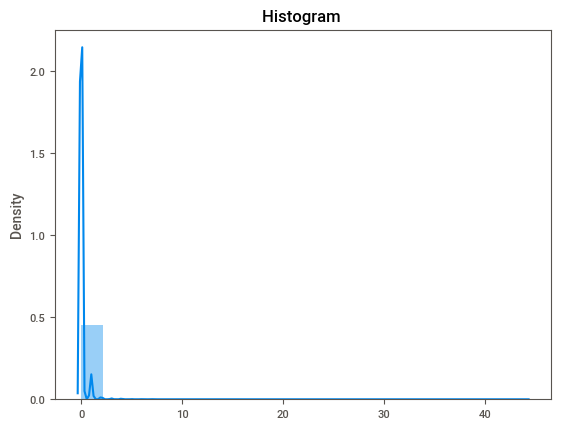

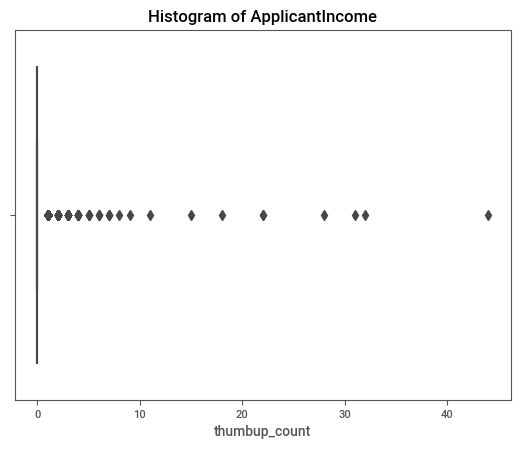

In [19]:
fig, ax = plt.subplots()
ax.set(title ="Histogram ")
sns.distplot(a=train[["thumbup_count"]], bins=20)
fig, ax = plt.subplots()
ax.set(title ="Histogram of ApplicantIncome")
sns.boxplot(x="thumbup_count", data=train)

<AxesSubplot:title={'center':'Histogram '}, ylabel='Density'>

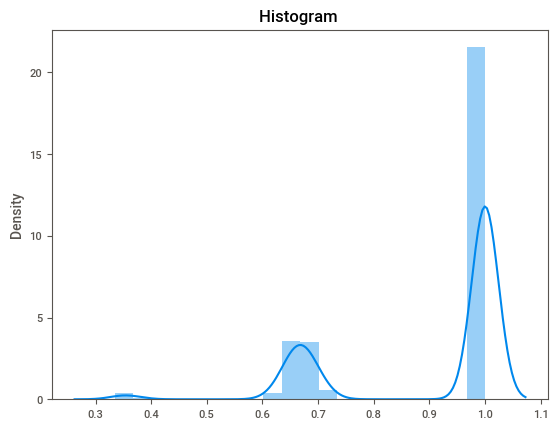

In [20]:
fig, ax = plt.subplots()
ax.set(title ="Histogram ")
sns.distplot(a=train[["sentiment_confidence"]], bins=20)

In [21]:
train

,review_id,user_name,airline_sentiment,sentiment_confidence,negative_reason,negative_reason_confidence,airline_name,review_text,thumbup_count,review_coordinates,review_timestamp,review_city,user_timezone
930,569972097453137920,cristobalwong,neutral,0.3350,NaN,0.0000,Emirates,"Thank you, ^JH, appreciate the prompt response...",0,NaN,23/2/2015 13:28,San Francisco Bay Area,NaN
5873,568092537786748928,VegasRenegade,neutral,0.3353,NaN,0.0000,Lufthansa,All Flights lead to VEGAS BABY!,1,NaN,18/2/2015 8:59,The Wild Blue Yonder,Atlantic Time (Canada)
5963,568028183267639297,CourtSnod,positive,0.3356,NaN,0.0000,Lufthansa,de-icing is important!,0,NaN,18/2/2015 4:44,Tennessee Original,Central Time (US & Canada)
7436,568993773277069312,KoolieAshSays,neutral,0.3363,NaN,0.0000,Singapore Airlines,oh. Makes sense. My bad.,0,"[40.88529232, -73.856635]",20/2/2015 20:41,"ÜT: 17.9889591,-76.7712636",Pacific Time (US & Canada)
2254,569227372223811584,zachkpearson,positive,0.3366,NaN,0.0000,Emirates,. Thanks. Hopefully this is easily resolved.,0,NaN,21/2/2015 12:09,"Portland, Oregon",Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5281,568853498726449152,djknuckles,neutral,1.0000,NaN,NaN,Lufthansa,hello I was talking with but it says you moved...,0,NaN,20/2/2015 11:23,WORLDWIDE,Pacific Time (US & Canada)
5282,568853440794730496,woman4lif,neutral,1.0000,NaN,NaN,Lufthansa,I am following you now.,0,NaN,20/2/2015 11:23,Northern UT,Mountain Time (US & Canada)
5283,568852204750135296,woman4lif,neutral,1.0000,NaN,NaN,Lufthansa,I can go. I want to badly!!!! I don't know how...,0,NaN,20/2/2015 11:18,Northern UT,Mountain Time (US & Canada)
5274,568858194447085568,LRC110979,negative,1.0000,Customer Service Issue,0.6564,Lufthansa,yes but not with out an attitude and nasty com...,0,"[41.93001697, -72.68496357]",20/2/2015 11:42,"Rochester Hills, MI",Eastern Time (US & Canada)


In [22]:
train['review'] = train.apply(lambda row: row['negative_reason'] if not pd.isna(row['negative_reason']) and row['negative_reason'] != '' else row['airline_sentiment'], axis=1)

In [23]:
pd.crosstab(train['airline_name'], train['review'])


review,Bad Flight,Can't Tell,Cancelled Flight,Customer Service Issue,Damaged Luggage,Flight Attendant Complaints,Flight Booking Problems,Late Flight,Lost Luggage,longlines,neutral,positive
airline_name,,,,,,,,,,,,
EgyptAir,18,21,17,57,4,5,27,16,3,1,155,142
Emirates,208,351,166,637,20,156,132,492,261,46,660,465
Lufthansa,82,152,149,367,13,37,60,146,87,27,623,537
Qantas,78,176,218,693,10,77,117,223,137,31,404,293
Qatar Airways,97,228,175,773,10,118,116,425,143,47,361,256
Singapore Airlines,59,172,49,181,8,58,41,255,52,14,677,508


# Bivariate Analysis 


In [24]:
filtered_data_number = train[train['user_name'].str.contains(r'\d', regex=True, na=False)]

In [25]:
train[train['review_city']=='Does it really matter']

,review_id,user_name,airline_sentiment,sentiment_confidence,negative_reason,negative_reason_confidence,airline_name,review_text,thumbup_count,review_coordinates,review_timestamp,review_city,user_timezone,review
8810,569959415433965569,ElmiraBudMan,negative,0.6702,Flight Attendant Complaints,0.6702,Qatar Airways,I get some bs from a guy at the door says door...,0,NaN,23/2/2015 12:38,Does it really matter,NaN,Flight Attendant Complaints
9127,569694350831161344,ElmiraBudMan,negative,0.6718,Customer Service Issue,0.6718,Qatar Airways,always nice when a customer service manager th...,0,NaN,22/2/2015 19:04,Does it really matter,NaN,Customer Service Issue
8771,569971542538346496,ElmiraBudMan,negative,0.6902,Can't Tell,0.6902,Qatar Airways,the exhaustion of traveling n runnin thru the ...,0,NaN,23/2/2015 13:26,Does it really matter,NaN,Can't Tell
8777,569970626057801728,ElmiraBudMan,neutral,0.7010,NaN,0.0000,Qatar Airways,doesn't take into account the $ it cost rent a...,0,NaN,23/2/2015 13:22,Does it really matter,NaN,neutral
9138,569686602940858368,ElmiraBudMan,negative,1.0000,Bad Flight,0.6596,Qatar Airways,why the hell did you overbook a plane when you...,0,NaN,22/2/2015 18:34,Does it really matter,NaN,Bad Flight
9150,569682545375354880,ElmiraBudMan,negative,1.0000,Late Flight,0.6632,Qatar Airways,we don't control your stupidity in not having ...,0,NaN,22/2/2015 18:17,Does it really matter,NaN,Late Flight
9199,569660306298945537,ElmiraBudMan,negative,1.0000,Can't Tell,1.0000,Qatar Airways,this is the reason I avoid and like the plague...,0,NaN,22/2/2015 16:49,Does it really matter,NaN,Can't Tell
9198,569661113593425920,ElmiraBudMan,negative,1.0000,Bad Flight,0.3481,Qatar Airways,how can a plane scheduled to come in on time a...,0,NaN,22/2/2015 16:52,Does it really matter,NaN,Bad Flight
9202,569659137581326336,ElmiraBudMan,negative,1.0000,Flight Attendant Complaints,1.0000,Qatar Airways,hire smarter IT people if your systems keep cr...,0,NaN,22/2/2015 16:44,Does it really matter,NaN,Flight Attendant Complaints
9204,569658553381883905,ElmiraBudMan,negative,1.0000,Late Flight,0.6775,Qatar Airways,what is wrong with you guys and your inability...,1,NaN,22/2/2015 16:42,Does it really matter,NaN,Late Flight


In [26]:
user_to_city_mapping = train[train['user_timezone'] != ''].groupby('user_name')['user_timezone'].first()

# Fill in the empty review_city values using the mapping
train['user_timezone'] = train.apply(
    lambda row: user_to_city_mapping.get(row['user_name'], row['user_timezone']),
    axis=1
)


In [27]:
train[train['user_name']=="somekidnamedjon"]

,review_id,user_name,airline_sentiment,sentiment_confidence,negative_reason,negative_reason_confidence,airline_name,review_text,thumbup_count,review_coordinates,review_timestamp,review_city,user_timezone,review
8336,567776348828360707,somekidnamedjon,positive,0.6485,NaN,NaN,Singapore Airlines,I would love for you to fly my best friend hom...,0,NaN,17/2/2015 12:03,✈️✈️,Eastern Time (US & Canada),positive


we need to identify spams and elimination of data that attribute nothing to the sentimente analysis:<br>
we found that news and user spams are both included in the database. 
In the mean time we also don't see much values in the timezone. As user time zone does not impact sentiment of their 
Therefore, we decide to not include that column too. 

We would also get ride off the he thumb_up data as it contains a 94% zero value.

creat a column that is a count of occurance of the user name  

In [28]:
train['user_name_count'] = train.groupby('user_name')['user_name'].transform('count')

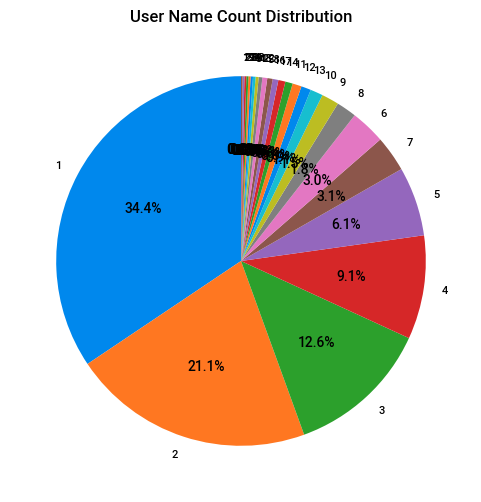

In [29]:
user_name_count = train['user_name_count'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(user_name_count, labels=user_name_count.index, autopct='%1.1f%%', startangle=90)
plt.title('User Name Count Distribution')
plt.show()

I want to see the distribution for airline sentiment where only user name that contained numbers are selected.

Text(0.5, 1.0, 'Airline Sentiment Distribution')

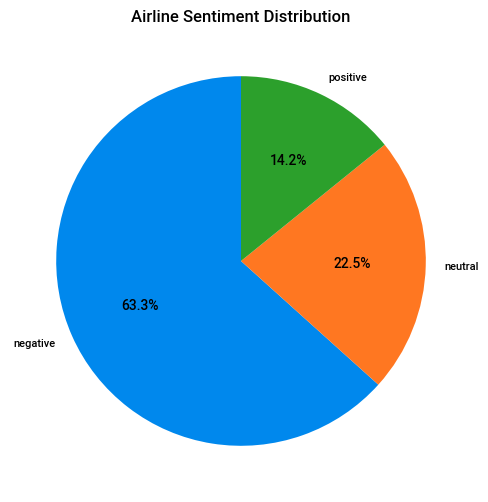

In [30]:
sentiment_counts=filtered_data_number['airline_sentiment'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Airline Sentiment Distribution')

In [31]:
user_name_counts = train['user_name'].value_counts()
filtered_df = train[train['user_name'].isin(user_name_counts[user_name_counts<6].index)]

In [32]:
count_blank = len(train[(train['user_timezone'].isna() | train['user_timezone'].eq('')) & (train['review_city'].isna() | train['review_city'].eq(''))])

print("Number of rows where both 'review_timestamp' and 'review_city' are blank:", count_blank)

Number of rows where both 'review_timestamp' and 'review_city' are blank: 2473


In [33]:
count_blank2 = len(train[
    (train['user_timezone'].isna() | train['user_timezone'].eq('')) &
    (train['review_city'].isna() | train['review_city'].eq('')) &
    (train['review_coordinates'].isna() | train['review_coordinates'].eq(''))
])

print("Number of rows where 'user_timezone', 'review_city', and 'review_coordinates' are blank:", count_blank)


Number of rows where 'user_timezone', 'review_city', and 'review_coordinates' are blank: 2473


In [34]:
debug_selection = len(train[(train['negative_reason_confidence'].isna()) & (train['airline_sentiment'] == 'negative')])
print(debug_selection)

0


as we can see, the reivew text for sentiments contain things like #Name and thanks. It would be resasonable for us to exclude those from our anlysis as

From the above EDA extracts we can see: <br>
1. The airline sentiment are separated into 3 different kinds with 63% in negative, 21% in neural, and 16% in positive.<br>
2. There are 10 negative reasons, and the top 1 accounts for 32% being: Customer service Issue.<br>
3. We can see the data is collected from 6 different airline companies, with the top 3 being Emirate (26%), Qatar Airways(20%), and Qantas (19%)<br>

<br>
The data is suffering from missing data:<br>

1. 92.24% of review coordinates are missing, we this varible is going to cause collinearity issue with review city and we decide to keep review city. <br>

2. Contrary to our believe,review city and user time zone do not share all its missing rows. Only 2499 rows are missing for both review city and review time_zone. The inclusion of review coordinate can bring this down to 2418.<br>

3. The missing values of negative_reason is caused by the airline_sentiment not being negative. we are going to create a new column called reivew and backfill " positive" or "neural" for the missing values.


Due to the frequent apperance of unformted and incorrect entries, we are unable to use review city and decide to remove that one.
Due to the huge amount of missing data for the review coordianate. we decide to remove this column too.

## Feature Engineering 

In [42]:
# preprocessing data
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() 
target = le.fit_transform(train['airline_sentiment']) # convert target into integers
train['airline_sentiment'] = target
print(le.classes_) # this shows which index maps to which class


[0 1 2]


In [43]:
np.random.seed(511365)

index = list(range(train.shape[0])) # an list of indices
np.random.shuffle(index) # shuffle the index in-place

p_val = 0.2
p_test = 0.2
N_test = int(train.shape[0] * p_test)
N_val = int(train.shape[0] * p_val)


# get training, val and test sets
test_data = train.iloc[ index[:N_test] ,:]
val_data = train.iloc[ index[N_test: (N_test+N_val)], :]
train_data = train.iloc[ index[(N_test+N_val):], :]

print(test_data.shape)
print(val_data.shape)
print(train_data.shape)

(2724, 15)
(2724, 15)
(8172, 15)


In [44]:
# define our own torch dataset
# for a torch dataset, we need to define two functions: 
#     __len__: return the length of dataset
#     __getitem__: given a index (integer), return the corresponding sample, both y and X

class SpamDataset(utils.data.Dataset):
    def __init__(self, myData):
        """
        myData should be a dataframe object containing both y (first col) and X (second col)
        """
        super().__init__()
        self.data = myData
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        
        return (self.data.iloc[idx,2], self.data.iloc[idx,7]) # (target, text)

In [45]:
# now we can build our torch dataset 
train_torch = SpamDataset(train_data)
val_torch = SpamDataset(val_data)
test_torch = SpamDataset(test_data)

In [46]:
tokenizer = get_tokenizer('basic_english')

In [47]:
from torchtext.vocab import build_vocab_from_iterator

# ===== Build vocabulary =====
# an unknown token is added for all unknown words outside the documents
# you may specify the min_freq to filter out infrequent words
vocabulary = build_vocab_from_iterator(
    [tokenizer(msg) for msg in train['review_text']],
    specials=["<unk>"],
    min_freq = 3, # filter out all words that appear less than three times
)
# Set to avoid errors with unknown words
vocabulary.set_default_index(vocabulary["<unk>"])

In [48]:
# define a function that converts a document into tokens (represented by index)
def doc_tokenizer(doc):
    return torch.tensor([vocabulary[token] for token in tokenizer(doc)], dtype=torch.long)

In [49]:
# define a function that converts a document into tokens in list instead of tensor
def doc_tokenizer2(doc):
    return [vocabulary[token] for token in tokenizer(doc)]

In [50]:
# ========= Step 2 ==============
# Notice in a corpus, each document can have different size. Thus, we usually pad zeros to the maximum length of document.
# Alternatively, you can concat all documents into a long vector 
# and the starting index of each document is identified in the variable called offsets.

def collate_batch(batch):
    
    target_list, text_list, offsets = [], [], [0] # initalize the first offset to be 0 here
        
    # loop through all samples in batch
    for idx in range(len(batch)):
        
        _label = batch[idx][0]
        _text = batch[idx][1]
        
        target_list.append( _label )
        tokens = doc_tokenizer( _text )
        text_list.append(tokens)
        
        # ====== wrong ======
        #if idx == 0:
        #    offsets.append(0)  # the first document starts from idx 0
        #else:
        #    offsets.append(offsets[-1] + tokens.size(0)) # the next document starts from (offsets[-1] + tokens.size(0))
        # ===================
        
        offsets.append(offsets[-1] + tokens.size(0))
    
    offsets = offsets[:-1] # remove the last entry
    
    # convert to torch tensor
    target_list = torch.tensor(target_list, dtype=torch.int64)
    offsets = torch.tensor(offsets)
    text_list = torch.cat(text_list) # concat into a long vector
    
    return target_list, text_list, offsets

In [51]:
torch.manual_seed(0)

batchSize = 8
train_loader = utils.data.DataLoader(train_torch, batch_size=batchSize, shuffle=True, collate_fn=collate_batch)
val_loader = utils.data.DataLoader(val_torch, batch_size=batchSize, shuffle=True, collate_fn=collate_batch)
test_loader = utils.data.DataLoader(test_torch, batch_size=batchSize, shuffle=False, collate_fn=collate_batch)

In [52]:
train_sentiment= list(train_data['airline_sentiment'])
train_review_text= []
for idx in range(len(train_data['review_text'])):
    token=doc_tokenizer2( list(train_data['review_text'])[idx])
    train_review_text.append(token)


In [ ]:
list(train_loader)

train_loader is tokenized values we processed 

Model building

In [ ]:
# ====== Step 1 ========= 
class SpamClassifier(nn.Module):
    def __init__(self, vocab_size, embed_dim):
        super().__init__()
        self.embedding = nn.EmbeddingBag(vocab_size, embed_dim, mode='mean') # embedding layer
        self.Linear1 = nn.Linear(embed_dim, 1)
        self.Dropout = nn.Dropout(p=0.1)
    
    def forward(self, text, offsets):
        # note we need offsets to indicate which document we have
        out = self.embedding(text, offsets)
        out = self.Dropout(out)
        out = self.Linear1(out)
        return out
        # for the last layer, we don't apply activation because we can use BCEWithLogitsLoss to combine sigmoid with BCELoss
        
# model initalization
embed_dim = 8
model = SpamClassifier(len(vocabulary), embed_dim)

In [ ]:
# ======= Step 2 ==========
loss_fn = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)

In [ ]:
def evaluate(dataloader):
    
    y_pred = torch.tensor([]) # store prediction
    y_true = torch.tensor([]) # store true label
    
    model.eval()
    with torch.no_grad():
        for label, text, offsets in dataloader:
            y_pred_batch = model(text, offsets)
            
            y_pred = torch.cat((y_pred, y_pred_batch.squeeze()))
            y_true = torch.cat((y_true, label.squeeze()))
            
    return y_pred, y_true

In [ ]:
# ======== Step 3 ==============
epochs = 300
for epoch in range(epochs):
    
    for y_train, text, offsets in train_loader:
        # zero the parameter gradients
        optimizer.zero_grad()

        # calulate output and loss 
        y_pred_train = model(text, offsets)
        loss = loss_fn(y_pred_train.squeeze(), y_train.float())

        # backprop and take a step
        loss.backward()
        optimizer.step()
    
    # evaluate on validation set
    y_pred_val, y_val = evaluate(val_loader)
    loss_val = loss_fn(y_pred_val.squeeze(), y_val.float())
    
    # note when making prediction, do add sigmoid activation
    pred_label = (torch.sigmoid(y_pred_val) > 0.5).long() # find out the class prediction
    acc = (pred_label == y_val).float().sum()/y_val.shape[0]
    
    model.train() # because when evaluating we change mode to eval mode
    
    print('Epoch {}: {:.4f} (train), {:.4f} (val), {:.4f} (val acc)'.format(epoch, loss, loss_val, acc))

In [ ]:
# prediction on test data
y_pred_test, y_true_test = evaluate(test_loader)
y_pred_test = torch.sigmoid(y_pred_test) > 0.5

print(confusion_matrix(y_true_test, y_pred_test))
print(classification_report(y_true_test, y_pred_test))

using word embedding

In [ ]:
# ===== Build vocabulary =====
vocab2 = build_vocab_from_iterator(
    [tokenizer(s) for s in train],
    specials=["<unk>"]
)

vocab2.set_default_index(vocab2["<unk>"])

In [ ]:
# Function to convert a sentence to BoW sequence
vocab2_len = len(vocab2)
def index2onehot(idx, n = vocab2_len):
    eye = torch.eye(vocab2_len)
    return eye[:,idx]

def stobow(s):
    token_idxs = vocab2(tokenizer(s))
    return index2onehot(token_idxs), torch.Tensor(token_idxs).long()

# Convert all training sentences
bow_sequences = []
for s in train['review_text']:
    bow_sequences.append(stobow(s)) 

In [204]:
# Model class
class RNN(nn.Module):
    def __init__(self, n_features, n_class, hidden_dim=20):
        super().__init__()
        # Model layers
        self.rnn = nn.RNN(n_features, hidden_dim)
        self.fc = nn.Linear(hidden_dim, n_class)
        
    def forward(self, x):
        rnn_o, h = self.rnn(x)
        fc_o = self.fc(rnn_o[-1, :]) 
        return fc_o

# init model
model = RNN(n_features=vocab2_len, n_class=vocab2_len)

# init loss
loss_function = nn.CrossEntropyLoss()

# init optimizer
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [205]:
max_iter = 300
seq_length = 2
loss_history = []
for epoch in range(max_iter):
    
    for i in range(len(bow_sequences)):
    
        Sent, tokens = bow_sequences[i]
        
        for j in range(Sent.shape[1]-seq_length):
            # loop over the two-grams
            X = Sent[:, j:j+seq_length] # j, j+1 words
            y = tokens[j+seq_length] # j+2 word as label
        
            optimizer.zero_grad()

            output = model(X.T) # pytorch requires input to be [Length, inputsize]
                        
            loss = loss_function(output, y)

            loss.backward()
            optimizer.step()

    # Collect loss at end of each iteration
    loss_history.append(loss.item())

KeyboardInterrupt: 

In [ ]:
plt.figure()
plt.plot(loss_history)

Spam Classification 


In [209]:
# preprocessing data
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() 
target = le.fit_transform(train['airline_sentiment']) # convert target into integers
train['airline_sentiment'] = target
print(le.classes_) # this shows which index maps to which class

train.head()

[0 1 2]


,review_id,user_name,airline_sentiment,sentiment_confidence,negative_reason,negative_reason_confidence,airline_name,review_text,thumbup_count,review_coordinates,review_timestamp,review_city,user_timezone,review,user_name_count
930,569972097453137920,cristobalwong,1,0.3350,NaN,0.0,Emirates,"Thank you, ^JH, appreciate the prompt response...",0,NaN,23/2/2015 13:28,San Francisco Bay Area,None,neutral,7
5873,568092537786748928,VegasRenegade,1,0.3353,NaN,0.0,Lufthansa,All Flights lead to VEGAS BABY!,1,NaN,18/2/2015 8:59,The Wild Blue Yonder,Atlantic Time (Canada),neutral,1
5963,568028183267639297,CourtSnod,2,0.3356,NaN,0.0,Lufthansa,de-icing is important!,0,NaN,18/2/2015 4:44,Tennessee Original,Central Time (US & Canada),positive,1
7436,568993773277069312,KoolieAshSays,1,0.3363,NaN,0.0,Singapore Airlines,oh. Makes sense. My bad.,0,"[40.88529232, -73.856635]",20/2/2015 20:41,"ÜT: 17.9889591,-76.7712636",Pacific Time (US & Canada),neutral,1
2254,569227372223811584,zachkpearson,2,0.3366,NaN,0.0,Emirates,. Thanks. Hopefully this is easily resolved.,0,NaN,21/2/2015 12:09,"Portland, Oregon",Pacific Time (US & Canada),positive,1


simplified adaboost (week 11)

In [93]:
def find_max_list(list):

    list_len = [len(i) for i in list]
    return(max(list_len))

In [99]:
shape=[len(train_review_text),find_max_list(train_review_text)]

for each row number in train_review_text add zero values to match the shape of desired shape.

In [105]:

to_shape(np.array(train_review_text),shape).shape

C:\Users\Aorus\AppData\Local\Temp\ipykernel_53484\1715149293.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  to_shape(np.array(train_review_text),shape).shape


ValueError: not enough values to unpack (expected 2, got 1)

In [79]:
train_sentiment= list(train_data['airline_sentiment'])
train_review_text= []
for idx in range(len(train_data['review_text'])):
    token=doc_tokenizer2( list(train_data['review_text'])[idx])
    train_review_text.append(token)


In [84]:
np.array(train_review_text)

C:\Users\Aorus\AppData\Local\Temp\ipykernel_53484\2779260194.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(train_review_text).reshape(-1, 1)


array([[list([25, 8, 2323, 1141, 14, 3958, 366, 9, 147, 58, 4, 160, 1142, 14, 3196, 30, 0, 10, 480, 8, 686, 30, 2994])],
       [list([98, 1029, 83, 42, 90, 70, 170, 2, 4, 754, 133, 17, 1857, 943, 80, 7, 47, 9, 42, 12, 30, 1819, 7])],
       [list([122, 10, 35, 1242, 1])],
       ...,
       [list([1758, 54, 5, 93, 265, 23, 14, 114, 0, 70, 48, 54, 5, 115, 452, 30, 336, 1, 31, 420, 20, 8, 271, 11, 161, 7])],
       [list([3, 1982, 5, 19, 1034, 8, 270, 381, 92, 3, 26, 148, 69, 26, 31, 494, 105, 22, 146, 1, 32, 16, 0, 105, 15, 954, 10, 1986, 75, 3, 79, 99, 84, 191, 63])],
       [list([418, 311, 1, 9, 108, 0, 18, 11, 1557, 21, 701, 1, 73, 9, 6])]],
      dtype=object)

In [75]:
train_review_text=np.array(train_review_text)
train_review_text=train_review_text.reshape(-1, 1)

In [65]:
token2=doc_tokenizer2( list(train_data['review_text'])[2])

In [57]:
train_sentiment=np.array(train_sentiment)

In [81]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

weak_learner = DecisionTreeClassifier(max_leaf_nodes=8)#this is a hyper parameter and needs to be tunned
n_estimators = 300

adaboost_clf = AdaBoostClassifier(
    base_estimator=weak_learner,#Use estimator instead of base_estimator for sklearn over version 1.2 
    n_estimators=n_estimators,
    algorithm="SAMME",
    random_state=42,
).fit(train_review_text,train_sentiment)
'''where X_train is the number valued review text, and the y_train is the sentiment(0,1,2)'''

E:\Annaconda\lib\site-packages\sklearn\utils\validation.py:746: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = np.asarray(array, order=order, dtype=dtype)


ValueError: Expected 2D array, got 1D array instead:
array=[list([25, 8, 2323, 1141, 14, 3958, 366, 9, 147, 58, 4, 160, 1142, 14, 3196, 30, 0, 10, 480, 8, 686, 30, 2994])
 list([98, 1029, 83, 42, 90, 70, 170, 2, 4, 754, 133, 17, 1857, 943, 80, 7, 47, 9, 42, 12, 30, 1819, 7])
 list([122, 10, 35, 1242, 1]) ...
 list([1758, 54, 5, 93, 265, 23, 14, 114, 0, 70, 48, 54, 5, 115, 452, 30, 336, 1, 31, 420, 20, 8, 271, 11, 161, 7])
 list([3, 1982, 5, 19, 1034, 8, 270, 381, 92, 3, 26, 148, 69, 26, 31, 494, 105, 22, 146, 1, 32, 16, 0, 105, 15, 954, 10, 1986, 75, 3, 79, 99, 84, 191, 63])
 list([418, 311, 1, 9, 108, 0, 18, 11, 1557, 21, 701, 1, 73, 9, 6])].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

gradient boosting

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

dummy_clf = DummyClassifier()


def misclassification_error(y_true, y_pred):
    return 1 - accuracy_score(y_true, y_pred)


weak_learners_misclassification_error = misclassification_error(
    y_test, weak_learner.fit(X_train, y_train).predict(X_test)
)

dummy_classifiers_misclassification_error = misclassification_error(
    y_test, dummy_clf.fit(X_train, y_train).predict(X_test)
)

print(
    "DecisionTreeClassifier's misclassification_error: "
    f"{weak_learners_misclassification_error:.3f}"
)
print(
    "DummyClassifier's misclassification_error: "
    f"{dummy_classifiers_misclassification_error:.3f}"
)

In [ ]:

boosting_errors = pd.DataFrame(
    {
        "Number of trees": range(1, n_estimators + 1),
        "AdaBoost": [
            misclassification_error(y_test, y_pred)
            for y_pred in adaboost_clf.staged_predict(X_test)
        ],
    }
).set_index("Number of trees")
ax = boosting_errors.plot()
ax.set_ylabel("Misclassification error on test set")
ax.set_title("Convergence of AdaBoost algorithm")

plt.plot(
    [boosting_errors.index.min(), boosting_errors.index.max()],
    [weak_learners_misclassification_error, weak_learners_misclassification_error],
    color="tab:orange",
    linestyle="dashed",
)
plt.plot(
    [boosting_errors.index.min(), boosting_errors.index.max()],
    [
        dummy_classifiers_misclassification_error,
        dummy_classifiers_misclassification_error,
    ],
    color="c",
    linestyle="dotted",
)
plt.legend(["AdaBoost", "DecisionTreeClassifier", "DummyClassifier"], loc=1)
plt.show()

In [ ]:
weak_learners_info = pd.DataFrame(
    {
        "Number of trees": range(1, n_estimators + 1),
        "Errors": adaboost_clf.estimator_errors_,
        "Weights": adaboost_clf.estimator_weights_,
    }
).set_index("Number of trees")

axs = weak_learners_info.plot(
    subplots=True, layout=(1, 2), figsize=(10, 4), legend=False, color="tab:blue"
)
axs[0, 0].set_ylabel("Train error")
axs[0, 0].set_title("Weak learner's training error")
axs[0, 1].set_ylabel("Weight")
axs[0, 1].set_title("Weak learner's weight")
fig = axs[0, 0].get_figure()
fig.suptitle("Weak learner's errors and weights for the AdaBoostClassifier")
fig.tight_layout()